In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cars.csv',header=0)

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [9]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [10]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

# Data Cleaning

In [11]:
df[df['year'].str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [12]:
df['year'] = df['year'].str.replace('[^\d]', '', regex=True)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [13]:
df['year'] = df['year'].fillna(0).astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    int32 
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 38.5+ KB


In [15]:
df = df[df['Price']!= "Ask For Price"]

In [16]:
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [17]:
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [19]:
df = df[df['kms_driven'].notna()]
df = df[df['kms_driven'].str.isnumeric()]

In [20]:
df['kms_driven'] = df['kms_driven'].astype(int)

In [21]:
df = df[~df['fuel_type'].isna()]

In [22]:
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [23]:
df.reset_index()

,index,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [24]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [25]:
df = df[df['Price']<6e6].reset_index(drop=True)

# EDA

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Hyundai'),
  Text(1, 0, 'Mahindra'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Maruti'),
  Text(4, 0, 'Skoda'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Renault'),
  Text(8, 0, 'Honda'),
  Text(9, 0, 'Datsun'),
  Text(10, 0, 'Mitsubishi'),
  Text(11, 0, 'Tata'),
  Text(12, 0, 'Volkswagen'),
  Text(13, 0, 'Chevrolet'),
  Text(14, 0, 'Mini'),
  Text(15, 0, 'BMW'),
  Text(16, 0, 'Nissan'),
  Text(17, 0, 'Hindustan'),
  Text(18, 0, 'Fiat'),
  Text(19, 0, 'Force'),
  Text(20, 0, 'Mercedes'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'Jaguar'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Volvo')])

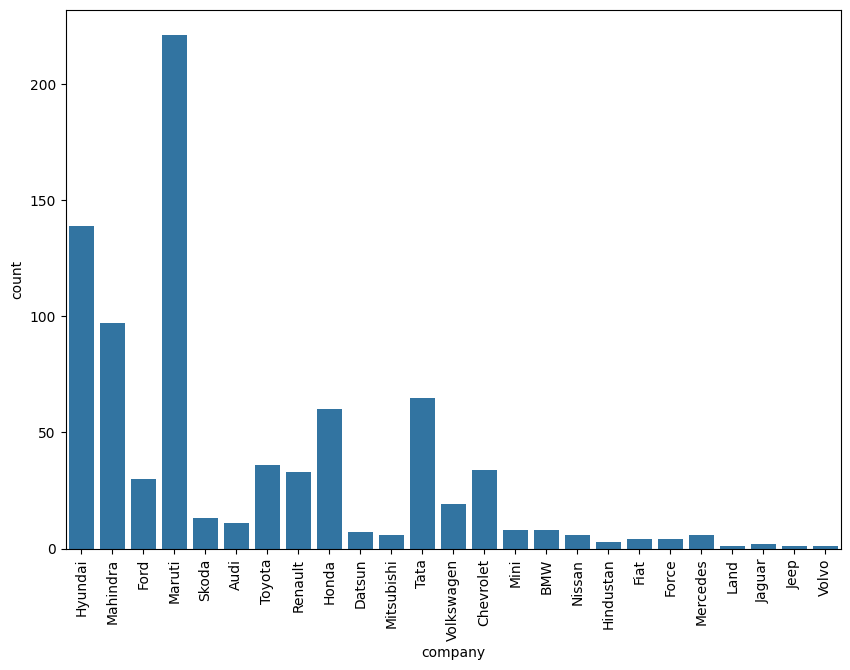

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='company')
plt.xticks(rotation=90)

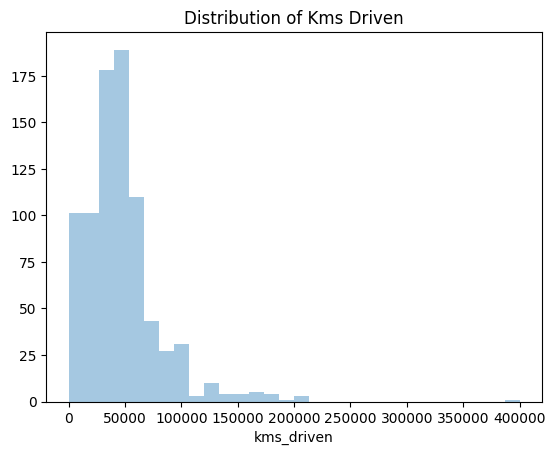

In [27]:
sns.distplot(df['kms_driven'], kde=False, bins=30) 
plt.title('Distribution of Kms Driven')
plt.show()

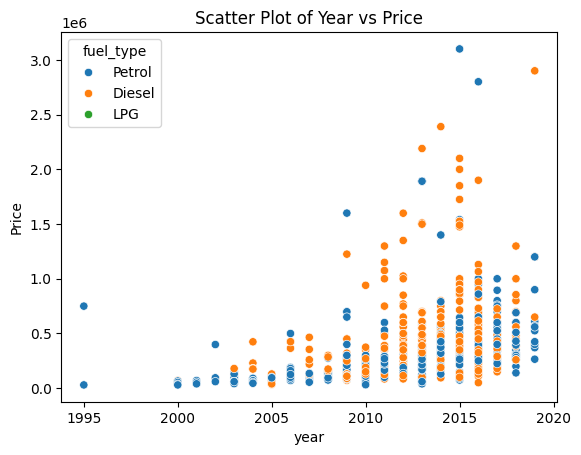

In [28]:
sns.scatterplot(x='year', y='Price', data=df, hue='fuel_type')
plt.title('Scatter Plot of Year vs Price')
plt.show()

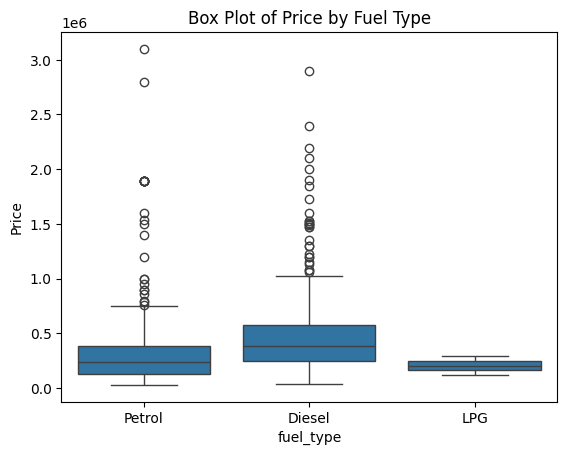

In [29]:
sns.boxplot(x='fuel_type', y='Price', data=df)
plt.title('Box Plot of Price by Fuel Type')
plt.show()

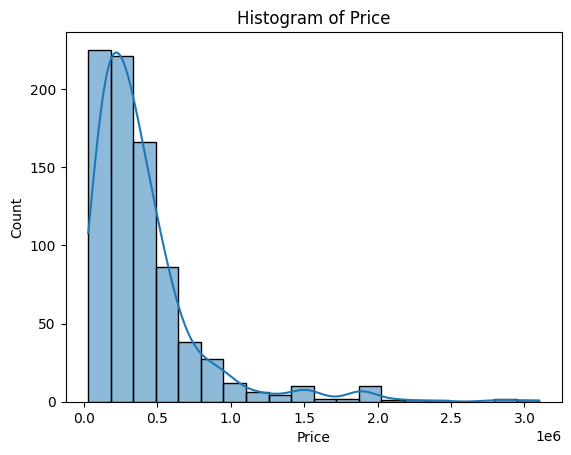

In [30]:
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Histogram of Price')
plt.show()

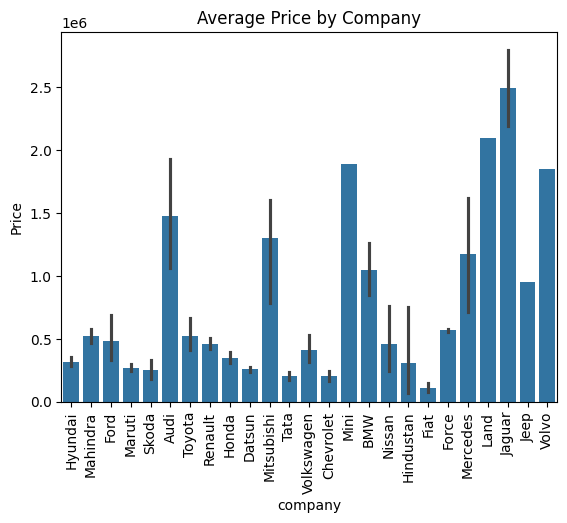

In [31]:
sns.barplot(x='company', y='Price', data=df)
plt.title('Average Price by Company')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.02, 'Pair Plot of Numerical Variables by Fuel Type')

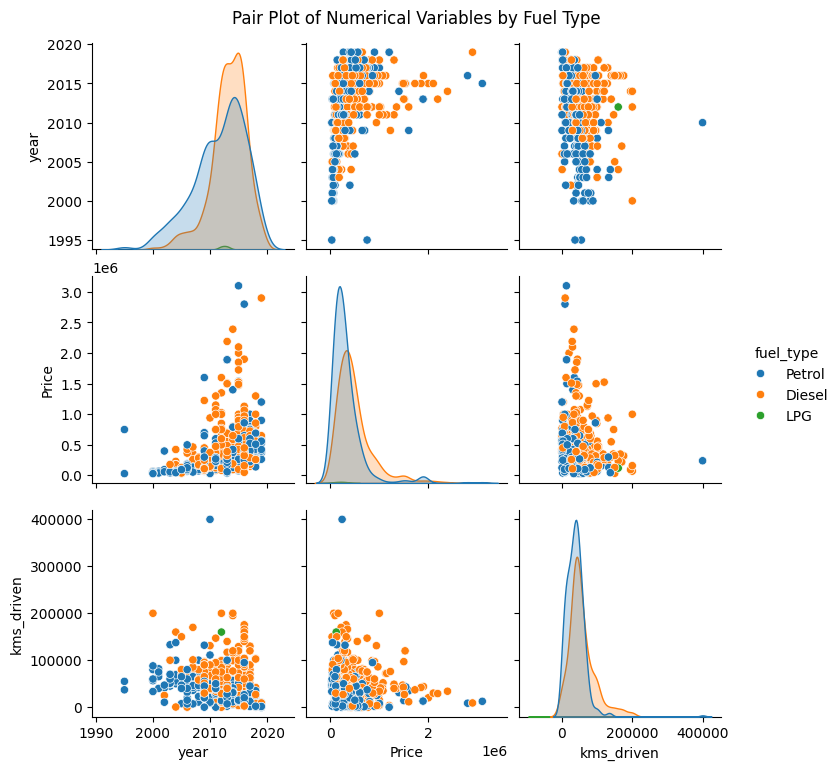

In [32]:
sns.pairplot(df[['year', 'Price', 'kms_driven', 'fuel_type']], hue='fuel_type')
plt.suptitle('Pair Plot of Numerical Variables by Fuel Type', y=1.02)

Text(0.5, 1.0, 'Count of Cars by Fuel Type')

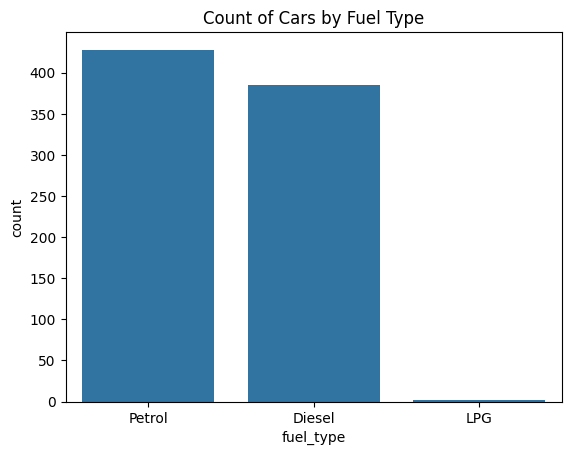

In [33]:
sns.countplot(x='fuel_type', data=df)
plt.title('Count of Cars by Fuel Type')

Text(0.5, 1.0, 'Proportion of Cars by Company')

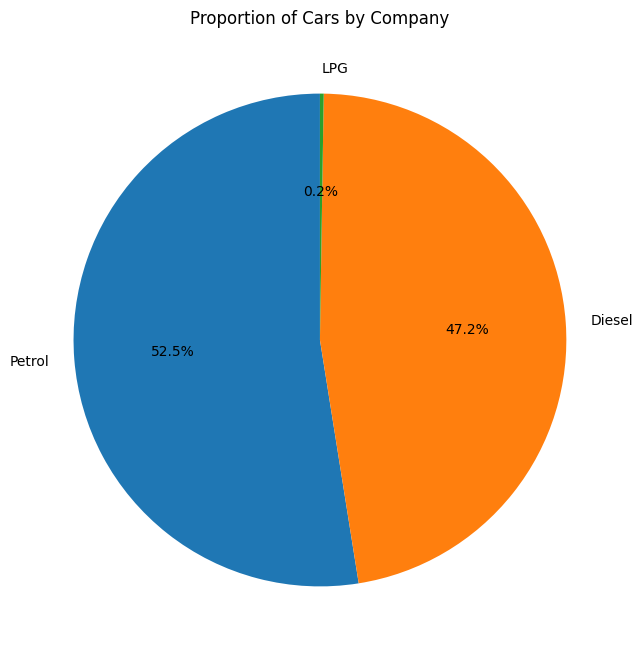

In [34]:
fuel_counts = df['fuel_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Cars by Company')

In [35]:
X = df.drop(['Price'],axis=1)
Y = df['Price']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [38]:
ohe.categories

'auto'

In [39]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type'])
], remainder='passthrough')

lr = LinearRegression()

pipe = Pipeline([
    ('pre', transformer),
    ('algo', lr)
])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Bea...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('algo', LinearRegression())])

In [40]:
Y_pred = pipe.predict(X_test)
Y_pred

array([  30440.35738657,  397737.91469386,  401652.32190272,
        477784.22518418,  396981.19980691,  450392.35444909,
         98593.00172313,  243717.89993121,  459563.39801189,
        199790.94345015,  382218.89248398,  328578.08285185,
        691210.82161498,  192192.11619774, 2036027.84651541,
        365034.49867972,  612807.6084374 ,  349745.00139212,
        943114.85502959,  249105.61993209,  370986.03970408,
        121728.68282225,  458812.65150424,  603203.00582312,
        359266.99225536,  355283.5277335 ,  458706.78300229,
        732880.87168746,  368355.95545727,  605483.67984141,
        692224.32940031,  407499.81877648,  174984.50318595,
        128485.40139112,  577955.39548885,  193108.81797225,
        382392.37002616,  634667.88360833,  486751.65430399,
        657033.50606208,  254861.31532914,  469299.57007867,
        -50631.22996122,  532637.22377499,  301305.72116377,
        252316.89689256,  412468.25894988, -124008.63057721,
        127349.23895247,

In [41]:
r2_score(Y_test,Y_pred)

0.5731311949541246

In [48]:
scores = []
for i in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = Pipeline([
    ('pre', transformer),
    ('algo', lr)
])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    scores.append(r2_score(Y_test,Y_pred))

In [49]:
np.argmax(scores)

433

In [50]:
scores[np.argmax(scores)]

0.8457059012561223

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = Pipeline([
    ('pre', transformer),
    ('algo', lr)
])
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)

In [52]:
r2_score(Y_test,Y_pred)

0.8457059012561223

In [55]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))

In [59]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([485864.98207345])